<a href="https://colab.research.google.com/github/meghorikawa/ULLM/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# load athletes csv
df_athlete=pd.read_csv("/content/athletes_df_combined.csv") # this is a CSV file that was created from manually compiling the FS and COT parsed DF csv files

In [ ]:
def map_to_boolean(cell, col_name):
  """
  Helper method to map string values to boolean
  """
  if isinstance(cell, str):
      cell_lower = cell.lower()  # Case insensitive check
      if cell_lower in ['true', 'partially true', 'partly true', "comparative adverbs"]:  # Values considered True (based on the inspection of our specific data)
          return True
      elif cell_lower in ['false']:  # Values considered False
          return False
      else:
          return float('nan')
  # Only "construct" or "factual" columns can contain NaNs
  if "factual" not in col_name and "constr" not in col_name and pd.isna(cell):
      return False
  return cell  # Return unchanged if it's not a match

In [ ]:
# ATHLETES
# Observe the data and clean it: Change all strings "True"/"False" to Boolean, undecided must be NaN

#get columns that say "factual"
factual_colnames = df_athlete.filter(like='factual').columns.tolist()
#get columns that say "relevance"
relevance_colnames = df_athlete.filter(like='relevance').columns.tolist()
#get columns that say "construct_present"
construct_colnames = df_athlete.filter(like='construct_present').columns.tolist()

col_name_lists_athletes = [factual_colnames, relevance_colnames, construct_colnames]
col_name_lists_bday = [relevance_colnames, construct_colnames]

col_name_lists = col_name_lists_athletes

def print_unique_values_per_col(df):
  """
  Prints unique values for each column in a dataframe. Useful for inspecting and cleaning the data
  """
  for col_list in col_name_lists:
    unique_values = {col: df[col].unique() for col in col_list}

    # Output unique values
    for col, values in unique_values.items():
        print(f"Unique values in {col}: {values}")

  print("\n________________________________________\n")


print("Data before cleaning\n")
print_unique_values_per_col(df_athlete)

# Now clean the Athlete data
for col_list in col_name_lists_athletes:
  unique_values = {col: df_athlete[col].unique() for col in col_list}

  # clean the data of strings unwanted strings
  for col, values in unique_values.items():
      # The cells that are strings but should be booleans must be changed into booleans. Only "factual"  and "construct" columns should allow NaNs
      df_athlete[col] = df_athlete[col].apply(map_to_boolean, args=(col,))

# ensure the data has now been cleaned

print("Data after cleaning\n")
print_unique_values_per_col(df_athlete)

Data before cleaning

Unique values in factual: [False True nan]
Unique values in factual_FS_0: [False True nan]
Unique values in factual_FS_1: [False True nan]
Unique values in factual_FS_2: [True False nan]
Unique values in factual_FS_3: [True False nan]
Unique values in factual_FS_4: [True False nan]
Unique values in factual_FS_5: [True False nan]
Unique values in factual_COT_1: ['FALSE' nan 'TRUE' 'Not applicable' 'Cannot be determined'
 'Cannot Determine' 'Not Applicable' 'Neither' 'Unknown' 'Partially True'
 'Not Evaluated']
Unique values in factual_COT_2: ['TRUE' 'FALSE' nan 'Cannot Determine' 'Not Applicable' 'Not applicable'
 'Unknown' 'Cannot Say' 'Cannot determine']
Unique values in factual_COT_3: ['TRUE' 'FALSE' nan 'Not applicable' 'Not Applicable' 'Unknown'
 'Partially True' 'Cannot be determined']
Unique values in factual_COT_4: ['TRUE' 'FALSE' 'Not Applicable' nan 'Unknown' 'Not applicable'
 'Cannot be determined']
Unique values in factual_COT_5: ['TRUE' 'FALSE' 'Partly

**We have noticed that sometimes "construct_present" outputs None instead of False when there is a construct being elicited. The chains of thought reveal that this occurs when the construct was not found - namely, when the value should have in fact been False.**

The code block below solves this issue: ensure that NaN only occurs in the FS/COT_construct_present columns when the target_construct is also NaN. Otherwise, it should be False

In [ ]:
def ensure_construct_present_false(df):
  '''
  A function that ensures that NaNs only appear in construct_present columns when the target_construct is NaN.
  Otherwise, it should be False.

  -------------
  parameters:
    df - the dataframe
  '''
  # columns that say "construct_present" in the name
  construct_colnames = df.filter(like='construct_present').columns.tolist()

  # if the human-annotated column, target_constr, is not NaN, neither should be the model's output
  for col in construct_colnames:
    df.loc[(~ pd.isna(df['target_constr']) & pd.isna(df[col])), col] = False

  return df


df_athlete = ensure_construct_present_false(df_athlete)


In [ ]:
# Load CSV for Bday task
df_bday=pd.read_csv('/content/bday_df_combined.csv') # this is a CSV file that was created from manually compiling the FS and COT parsed DF csv files

In [ ]:
# BIRTHDAY
# Observe the data and clean it: Change all strings "True"/"False" to Boolean, undecided must be NaN

#get columns that say "relevance"
relevance_colnames = df_bday.filter(like='relevance').columns.tolist()
#get columns that say "construct_present"
construct_colnames = df_bday.filter(like='construct_present').columns.tolist()


col_name_lists = col_name_lists_bday

df_bday = ensure_construct_present_false(df_bday)
print_unique_values_per_col(df_bday) # Data looks good!


Unique values in relevance_lex: [ True False]
Unique values in relevance_human: [ True False]
Unique values in relevance_FS_0: [ True False]
Unique values in relevance_FS_1: [ True False]
Unique values in relevance_FS_2: [ True False]
Unique values in relevance_FS_3: [ True False]
Unique values in relevance_FS_4: [ True False]
Unique values in relevance_FS_5: [ True False]
Unique values in relevance_COT_1: [ True False]
Unique values in relevance_COT_2: [ True False]
Unique values in relevance_COT_3: [ True False]
Unique values in relevance_COT_4: [ True False]
Unique values in relevance_COT_5: [ True False]
Unique values in relevance_COT_0: [ True False]
Unique values in construct_present_FS_0: [False nan True]
Unique values in construct_present_FS_1: [False nan True]
Unique values in construct_present_FS_2: [False nan True]
Unique values in construct_present_FS_3: [False nan True]
Unique values in construct_present_FS_4: [False nan True]
Unique values in construct_present_FS_5: [True

In [ ]:
#precision, recall, accuracy, F1-score

athletes_properties = ["relevance", "factual", "construct_present"]
bday_properties = ["relevance", "construct_present"] # Birthday task requires no factuality checks
strategy = ['FS', 'COT']
k_shot = [0, 1, 2, 3, 4, 5]
class_labels = ['true', 'false', 'none']

In [ ]:
#columns for golden standards 'human_relavance' , 'contains_target_constr' , 'factual'
def accuracy_score(df, prop, strat, k):
    '''
    Calculates the average accuracy for a given property, strategy, and k-shot value.
    parameters:
      df - the dataframe
      prop - the property you want to check accuracy for (e.g. relevance, factual, construct_present)
      strat - the strategy you want to check accuracy for (e.g. FS, COT)
      k - the k-shot value you want to check accuracy for (e.g. 0, 1, 2, 3, 4, 5)
    '''

    gold_standard = ''

    # Determine the correct gold_standard column based on the property
    if prop == 'relevance':
        gold_standard = 'relevance_human'
    elif prop == 'factual':
        gold_standard = 'factual'
    elif prop == 'construct_present':
        gold_standard = 'contains_target_constr'
        df = df.dropna(subset=[f'{gold_standard}']).copy() # remove the rows that don't have target construct and create a copy

    # Add a column for correctness
    df.loc[:, f'correct_prediction_{prop}_{strat}_{k}'] = df[f'{prop}_{strat}_{k}'] == df[f'{gold_standard}']


    # Calculate total correct predictions
    total_correct = df[f'correct_prediction_{prop}_{strat}_{k}'].value_counts().get(True, 0)
    # Total number of predictions
    total_preds = len(df.index)

    # Return accuracy
    return  total_correct / total_preds



In [ ]:
# calculate the true positives
'''
# True Positive for the None class would be when both the expected value and the predicted value are None.
A False Positive would mean that the expected value was a Boolean but the predicted one was None,
and a False Negative would mean the expected value was None but the predicted value was a Boolean.
'''

def calculate_true_pos(df, prop, strat, k):
  '''
  Calculates the number of true positives for a given property, strategy, and k-shot value.
  parameters:
    df - the dataframe
    prop - the property the true_pos is for (e.g. relevance, factual, construct_present)
    strat - the strategy the true_pos is for (e.g. FS, COT)
    k - the k-shot value the true_pos is for (e.g. 0,
  '''

  # Determine the correct gold_standard column based on the property
  if prop == 'relevance':
    gold_standard = 'relevance_human'
  elif prop == 'factual':
    gold_standard = 'factual'
  elif prop == 'construct_present':
    gold_standard = 'contains_target_constr'
    df = df.dropna(subset=[f'{gold_standard}']) # remove the rows that don't have target construct

  # Calculate true positives
  true_pos = ((df[f'{prop}_{strat}_{k}'] == 1) & (df[f'{gold_standard}'] == 1)).sum()

  return true_pos

In [ ]:
# Calculate false positives (false positive means expected value was a boolean but the predicted was none)
def calculate_false_pos(df, prop, strat, k):
  '''
  Calculate the number of false　positives for a given property, strategy, and K-shot value.
  parameters:
    df - the dataframe
    prop - the property the false_pos is for (e.g. relevance, factual, construct_present)
    strat - the strategy the false_pos is for (e.g. FS, COT)
    k - the k-shot value the false_pos is for (e.g. 0,1,2,3,4,5)
  '''

# Determine the correct gold_standard column based on the property
  if prop == 'relevance':
    gold_standard = 'relevance_human'
  elif prop == 'factual':
    gold_standard = 'factual'
  elif prop == 'construct_present':
    gold_standard = 'contains_target_constr'
    df = df.dropna(subset=[f'{gold_standard}']) # remove the rows that don't have target construct

# Calculate false positives
  false_pos = ((df[f'{prop}_{strat}_{k}'] == 1) & (df[f'{gold_standard}'] == 0)).sum()

  return false_pos

In [ ]:
# false negative
def calculate_false_neg(df, prop, strat, k):
  '''
  Calculate the false negatives for a given property, strategy, and K-shot value.
  parameters:
    df - the dataframe
    prop - the property the false_neg is for (e.g. relevance, factual, construct
    strat - the strategy the false_neg is for (e.g. FS, COT)
    k - the k-shot value the false_neg is for (e.g. 0,1,2,3,4,5)
  '''
  # Determine the correct gold_standard column based on the property
  if prop == 'relevance':
    gold_standard = 'relevance_human'
  elif prop == 'factual':
    gold_standard = 'factual'
  elif prop == 'construct_present':
    gold_standard = 'contains_target_constr'
    df = df.dropna(subset=[f'{gold_standard}']) # remove the rows that don't have target construct

  # Calculate false negatives
  false_neg = ((df[f'{prop}_{strat}_{k}'] == 0) & (df[f'{gold_standard}'] == 1)).sum()

  return false_neg

In [ ]:
# Precision TP / (TP+FP)
def precision_score(df, prop, strat, k):
  '''
  Calculate the precision for a given property, strategy, and K-shot value.

  Parameters:
    df - the dataframe
    prop - the property the precision is for (e.g. relevance, factual, construct_present)
    strat - the strategy the precision is for (e.g. FS, COT)
    k - the k-shot value the precision is for
  '''
  true_pos = calculate_true_pos(df, prop, strat, k)
  false_pos = calculate_false_pos(df, prop, strat, k)
  if true_pos + false_pos == 0:
    return 0
  else:
    return true_pos/(true_pos+false_pos)

# Recall TP / (TP + FN)
def recall_score(df, prop, strat, k):
  '''
  Calculate the recall for a given property, strategy, and K-shot value.

  Parameters:
    df - the dataframe
    prop - the property the recall is for (e.g. relevance, factual, construct_present)
    strat - the strategy the recall is for (e.g. FS, COT)
    k - the k-shot value the recall is for
  '''
  true_pos = calculate_true_pos(df, prop, strat, k)
  false_neg = calculate_false_neg(df, prop, strat, k)
  if true_pos + false_neg == 0:
    return 0
  else:
    return true_pos / (true_pos + false_neg)

 # f1 score 2 * (Precision x Recall)/ (Precision + Recall)
def f1_score(df, prop, strat, k):
  '''
  Calculate the f1 score for a given property, strategy, and K-shot value.

  Parameters:
    df - the dataframe
    prop - the property the f1 score is for (e.g. relevance, factual, construct_present)
    strat - the strategy the f1 score is for (e.g. FS, COT)
    k - the k-shot value the f1 score is for
  '''
  precision = precision_score(df, prop, strat, k)
  recall = recall_score(df, prop, strat, k)
  if precision + recall == 0:
    return 0
  else:
    return 2 *((precision * recall) / (precision + recall))

In [ ]:
def list_maker(function_name, df, prop, strat, k):
  '''
  Will return a list of all of the calculated values for a given property up to K-shot value.

  Parameters:
    function_name - the metric function you want to run, for example, accuracy_score
    df - the dataframe
    prop - the property you want to check the metric for (e.g. relevance, factual, construct_present)
    strat - the strategy you want to check accuracy for (e.g. FS, COT)
    k - the greatest value you want to calculate for.
  '''

  if function_name == accuracy_score:
    function = accuracy_score
  elif function_name == precision_score:
    function = precision_score
  elif function_name == recall_score:
    function = recall_score
  elif function_name == f1_score:
    function = f1_score
  list = []
  for i in range(k+1):
    list.append(function_name(df, prop, strat, i))
  return list

In [ ]:
# First: Birthday Gift Task

#Labels
x_axis_labels = ['0-shot', '1-shot', '2-shot', '3-shot', '4-shot', '5-shot']
bday_y_axis_labels = ['K-Shot','cot_relevance', 'cot_construct_present', 'fs_relevance', 'fs_construct_present']

#Accuracy
rel_cot_accuracy_scores = list_maker(accuracy_score, df_bday, 'relevance', 'COT', 5)
const_cot_accuracy_scores = list_maker(accuracy_score, df_bday, 'construct_present', 'COT', 5)
rel_fs_accuracy_scores = list_maker(accuracy_score, df_bday, 'relevance', 'FS', 5)
const_fs_accuracy_scores = list_maker(accuracy_score, df_bday, 'construct_present', 'FS', 5)

#Precision
rel_cot_precision_scores = list_maker(precision_score, df_bday, 'relevance', 'COT', 5)
const_cot_precision_scores = list_maker(precision_score, df_bday, 'construct_present', 'COT', 5)
rel_fs_precision_scores = list_maker(precision_score, df_bday, 'relevance', 'FS', 5)
const_fs_precision_scores = list_maker(precision_score, df_bday, 'construct_present', 'FS', 5)

#Recall
rel_cot_recall_scores = list_maker(recall_score, df_bday, 'relevance', 'COT', 5)
const_cot_recall_scores = list_maker(recall_score,df_bday, 'construct_present', 'COT', 5)
rel_fs_recall_scores = list_maker(recall_score, df_bday, 'relevance', 'FS', 5)
const_fs_recall_scores = list_maker(recall_score, df_bday, 'construct_present', 'FS', 5)

#F1
rel_cot_f1_scores = list_maker(f1_score, df_bday, 'relevance', 'COT', 5)
const_cot_f1_scores = list_maker(f1_score, df_bday, 'construct_present', 'COT', 5)
rel_fs_f1_scores = list_maker(f1_score, df_bday, 'relevance', 'FS', 5)
const_fs_f1_scores = list_maker(f1_score, df_bday, 'construct_present', 'FS', 5)


In [ ]:
#Accuracy Scores for Bday Present Task
bday_accuracy_df = pd.DataFrame(list(zip(x_axis_labels,rel_cot_accuracy_scores,const_cot_accuracy_scores, rel_fs_accuracy_scores, const_fs_accuracy_scores)), columns=bday_y_axis_labels)
bday_accuracy_df.head(6)

,K-Shot,cot_relevance,cot_construct_present,fs_relevance,fs_construct_present
0,0-shot,0.798658,0.955556,0.832215,0.922222
1,1-shot,0.812081,0.833333,0.812081,0.911111
2,2-shot,0.805369,0.888889,0.798658,0.822222
3,3-shot,0.778523,0.888889,0.818792,0.788889
4,4-shot,0.771812,0.800000,0.785235,0.722222
5,5-shot,0.785235,0.833333,0.812081,0.655556


In [ ]:
#Precision Scores for Bday Present Task
bday_precision_df = pd.DataFrame(list(zip(x_axis_labels,rel_cot_precision_scores,const_cot_precision_scores, rel_fs_precision_scores, const_fs_precision_scores)), columns=bday_y_axis_labels)
bday_precision_df.head(6)

,K-Shot,cot_relevance,cot_construct_present,fs_relevance,fs_construct_present
0,0-shot,0.886179,0.960000,0.903226,0.857143
1,1-shot,0.875969,0.666667,0.864662,0.827586
2,2-shot,0.900000,0.757576,0.868217,0.648649
3,3-shot,0.903509,0.757576,0.882812,0.595238
4,4-shot,0.895652,0.604651,0.904348,0.523810
5,5-shot,0.890756,0.642857,0.894309,0.460000


In [ ]:
# Recall Scores for Bday Present Task
bday_recall_df = pd.DataFrame(list(zip(x_axis_labels,rel_cot_recall_scores,const_cot_recall_scores, rel_fs_recall_scores, const_fs_recall_scores)), columns=bday_y_axis_labels)
bday_recall_df.head(6)

,K-Shot,cot_relevance,cot_construct_present,fs_relevance,fs_construct_present
0,0-shot,0.872,0.888889,0.896,0.888889
1,1-shot,0.904,0.888889,0.920,0.888889
2,2-shot,0.864,0.925926,0.896,0.888889
3,3-shot,0.824,0.925926,0.904,0.925926
4,4-shot,0.824,0.962963,0.832,0.814815
5,5-shot,0.848,1.000000,0.880,0.851852


In [ ]:
#F1 Scores for Bday Present Task
bday_f1_df = pd.DataFrame(list(zip(x_axis_labels,rel_cot_f1_scores,const_cot_f1_scores, rel_fs_f1_scores, const_fs_f1_scores)), columns=bday_y_axis_labels)
bday_f1_df.head(6)

,K-Shot,cot_relevance,cot_construct_present,fs_relevance,fs_construct_present
0,0-shot,0.879032,0.923077,0.899598,0.872727
1,1-shot,0.889764,0.761905,0.891473,0.857143
2,2-shot,0.881633,0.833333,0.881890,0.750000
3,3-shot,0.861925,0.833333,0.893281,0.724638
4,4-shot,0.858333,0.742857,0.866667,0.637681
5,5-shot,0.868852,0.782609,0.887097,0.597403


# **Athlete Task Analysis**

In [ ]:
#Athlete Task
#Labels
x_axis_labels = ['0-shot', '1-shot', '2-shot', '3-shot', '4-shot', '5-shot']
athlete_y_axis_labels = ['K-Shot','cot_relevance', 'cot_construct_present','cot_factual', 'fs_relevance', 'fs_construct_present', 'fs_factual']

#Accuracy
athlete_rel_cot_accuracy_scores = list_maker(accuracy_score, df_athlete, 'relevance', 'COT', 5)
athlete_const_cot_accuracy_scores = list_maker(accuracy_score, df_athlete, 'construct_present', 'COT', 5)
athlete_fact_cot_accuracy_scores = list_maker(accuracy_score, df_athlete, 'factual', 'COT', 5)
athlete_rel_fs_accuracy_scores = list_maker(accuracy_score, df_athlete, 'relevance', 'FS', 5)
athlete_const_fs_accuracy_scores = list_maker(accuracy_score, df_athlete, 'construct_present', 'FS', 5)
athlete_fact_fs_accuracy_scores = list_maker(accuracy_score, df_athlete, 'factual', 'FS', 5)

#Precision
athlete_rel_cot_precision_scores = list_maker(precision_score, df_athlete, 'relevance', 'COT', 5)
athlete_const_cot_precision_scores = list_maker(precision_score, df_athlete, 'construct_present', 'COT', 5)
athlete_rel_fs_precision_scores = list_maker(precision_score, df_athlete, 'relevance', 'FS', 5)
athlete_const_fs_precision_scores = list_maker(precision_score, df_athlete, 'construct_present', 'FS', 5)

#Recall
athlete_rel_cot_recall_scores = list_maker(recall_score, df_athlete, 'relevance', 'COT', 5)
athlete_const_cot_recall_scores = list_maker(recall_score,df_athlete, 'construct_present', 'COT', 5)
athlete_rel_fs_recall_scores = list_maker(recall_score, df_athlete, 'relevance', 'FS', 5)
athlete_const_fs_recall_scores = list_maker(recall_score, df_athlete, 'construct_present', 'FS', 5)

#F1
athlete_rel_cot_f1_scores = list_maker(f1_score, df_athlete, 'relevance', 'COT', 5)
athlete_const_cot_f1_scores = list_maker(f1_score, df_athlete, 'construct_present', 'COT', 5)
athlete_rel_fs_f1_scores = list_maker(f1_score, df_athlete, 'relevance', 'FS', 5)
athlete_const_fs_f1_scores = list_maker(f1_score, df_athlete, 'construct_present', 'FS', 5)

In [ ]:
#Accuracy Scores for Athlete Present Task
athlete_accuracy_df = pd.DataFrame(list(zip(x_axis_labels,athlete_rel_cot_accuracy_scores,athlete_const_cot_accuracy_scores, athlete_fact_cot_accuracy_scores, athlete_rel_fs_accuracy_scores, athlete_const_fs_accuracy_scores, athlete_fact_fs_accuracy_scores)), columns=athlete_y_axis_labels)
athlete_accuracy_df.head(6)

,K-Shot,cot_relevance,cot_construct_present,cot_factual,fs_relevance,fs_construct_present,fs_factual
0,0-shot,0.774194,0.851613,0.619355,0.780645,0.696774,0.664516
1,1-shot,0.851613,0.806452,0.690323,0.761290,0.729032,0.658065
2,2-shot,0.800000,0.832258,0.606452,0.780645,0.716129,0.619355
3,3-shot,0.838710,0.903226,0.632258,0.774194,0.690323,0.632258
4,4-shot,0.819355,0.845161,0.658065,0.774194,0.703226,0.625806
5,5-shot,0.838710,0.812903,0.625806,0.787097,0.709677,0.619355


In [ ]:
#Precision Scores for Athletes Task
#bday labels are used, as factual property uses multi-class analysis
athlete_precision_df = pd.DataFrame(list(zip(x_axis_labels,athlete_rel_cot_precision_scores,athlete_const_cot_precision_scores, athlete_rel_fs_precision_scores, athlete_const_fs_precision_scores)), columns=bday_y_axis_labels)
athlete_precision_df.head(6)

,K-Shot,cot_relevance,cot_construct_present,fs_relevance,fs_construct_present
0,0-shot,0.800000,0.906977,0.747967,0.563218
1,1-shot,0.860000,0.966667,0.726562,0.581633
2,2-shot,0.826531,0.921053,0.744000,0.571429
3,3-shot,0.857143,0.905660,0.734375,0.549020
4,4-shot,0.869565,0.826923,0.734375,0.562500
5,5-shot,0.897727,0.737705,0.746032,0.564356


In [ ]:
#Recall Scores for Athletes Task bday labels are used as factual property uses multi-class analysis
athlete_recall_df = pd.DataFrame(list(zip(x_axis_labels,athlete_rel_cot_recall_scores,athlete_const_cot_recall_scores, athlete_rel_fs_recall_scores, athlete_const_fs_recall_scores)), columns=bday_y_axis_labels)
athlete_recall_df.head(6)

,K-Shot,cot_relevance,cot_construct_present,fs_relevance,fs_construct_present
0,0-shot,0.842105,0.672414,0.968421,0.844828
1,1-shot,0.905263,0.500000,0.978947,0.982759
2,2-shot,0.852632,0.603448,0.978947,0.965517
3,3-shot,0.884211,0.827586,0.989474,0.965517
4,4-shot,0.842105,0.741379,0.989474,0.931034
5,5-shot,0.831579,0.775862,0.989474,0.982759


In [ ]:
#F1 Scores for Athlete Task
athlete_f1_df = pd.DataFrame(list(zip(x_axis_labels,athlete_rel_cot_f1_scores,athlete_const_cot_f1_scores, athlete_rel_fs_f1_scores, athlete_const_fs_f1_scores)), columns=bday_y_axis_labels)
athlete_f1_df.head(6)

,K-Shot,cot_relevance,cot_construct_present,fs_relevance,fs_construct_present
0,0-shot,0.820513,0.772277,0.844037,0.675862
1,1-shot,0.882051,0.659091,0.834081,0.730769
2,2-shot,0.839378,0.729167,0.845455,0.717949
3,3-shot,0.870466,0.864865,0.843049,0.700000
4,4-shot,0.855615,0.781818,0.843049,0.701299
5,5-shot,0.863388,0.756303,0.850679,0.716981


In [ ]:
# multi class factual analysis for the athlete task
#adapting Daniela's R code she used on a previous project

def multi_class_factual_analysis(df, strat, k):
    '''
    Multi-class analysis for the factual property for the athlete task.
    parameters:
        df - the dataframe
        strat - the strategy the true_pos is for (e.g. FS, COT)
        k - the k-shot value the true_pos is for (e.g. 0,1,2,3,4,5)
    will output three dataframes,
        result: The results of precision, recall, and f1 calculations per each class
        macro_avg: The macro averages of precision, recall, and f1
        micro_avg: The micro averages of precision, recall, and f1
    '''

    class_labels = [True, False, "NaN"]
    # Initialize results df
    results_df = pd.DataFrame({
        'class': class_labels,
        'precision': [float('nan')] * len(class_labels),
        'recall': [float('nan')] * len(class_labels),
        'f1': [float('nan')] * len(class_labels)
    })

    total_tp = 0 # total true positives used to calculate the micro average
    total_fp = 0 # total false positives used to calculate the micro averages
    total_fn = 0 # total false negatives used to calculate the micro averages

    # Go through each class for the calculations
    for item in class_labels:
        tp = 0
        fp = 0
        fn = 0
        if (item != "NaN"):
          for i in range(len(df)):
            # If the generated label is the same as the gold standard and current item also same as gold standard = TP
              if df[f'factual_{strat}_{k}'][i] == item and df[f'factual'][i] == item:
                  tp += 1
                  total_tp += 1
            # If the generated label is same as current label of current item but not of the gold standard = FP
              elif df[f'factual_{strat}_{k}'][i] == item:
                  fp += 1
                  total_fp += 1
            # if the generated label does not match the current item but matches the gold standard.
              elif df[f'factual'][i] == item:
                  fn += 1
                  total_fn += 1
        else: # if item is none....
            for i in range(len(df)):
              # If generated label and gold standard are both none = TP
              if pd.isna(df[f'factual_{strat}_{k}'][i]) and pd.isna(df[f'factual'][i]):
                  tp += 1
                  total_tp += 1
              # if generated label is none, but gold standard isn't none = FP
              elif pd.isna(df[f'factual_{strat}_{k}'][i]):
                  fp += 1
                  total_fp += 1
              # if gold standard is none but generated label is not none
              elif pd.isna(df[f'factual'][i]):
                  fn += 1
                  total_fn += 1

        # Initialize precision and recall variables
        precision = 0
        recall = 0

        # Calculate precision and recall and add to results df
        if tp + fp != 0:
            precision = tp / (tp + fp)
        if tp + fn != 0:
            recall = tp / (tp + fn)

        # Calculate f1
        if precision + recall != 0:
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = float('nan')

        # Update results df
        results_df.loc[results_df['class'] == item, 'precision'] = precision
        results_df.loc[results_df['class'] == item, 'recall'] = recall
        results_df.loc[results_df['class'] == item, 'f1'] = f1

    # Make lists from the calculations above to aggregate
    precision_list = list(results_df['precision'])
    recall_list = list(results_df['recall'])
    f1_list = list(results_df['f1'])

    # Calculate macro average
    macro_avg = pd.DataFrame({
        'precision': sum(precision_list) / len(precision_list) if precision_list else float('nan'),
        'recall': sum(recall_list) / len(recall_list) if recall_list else float('nan'),
        'f1': sum(f1_list) / len(f1_list) if f1_list else float('nan'),
        },index=['macro_avg'])

    # Calculate micro average
    microavg_prec = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else float('nan')
    microavg_rec = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else float('nan')

    micro_avg = pd.DataFrame({
        'precision': microavg_prec,
        'recall': microavg_rec,
        'f1': 2 * (microavg_prec * microavg_rec) / (microavg_prec + microavg_rec) if (microavg_prec + microavg_rec) > 0 else float('nan')
    },index=['micro_avg'])

    return results_df, macro_avg, micro_avg

In [ ]:
# Carrying out the multi-class anaylisis for factuality for all number of examples and the two

FS_0_results, FS_0_macro, FS_0_micro = multi_class_factual_analysis(df_athlete, 'FS', 0)
FS_1_results, FS_1_macro, FS_1_micro = multi_class_factual_analysis(df_athlete, 'FS', 1)
FS_2_results, FS_2_macro, FS_2_micro = multi_class_factual_analysis(df_athlete, 'FS', 2)
FS_3_results, FS_3_macro, FS_3_micro = multi_class_factual_analysis(df_athlete, 'FS', 3)
FS_4_results, FS_4_macro, FS_4_micro = multi_class_factual_analysis(df_athlete, 'FS', 4)
FS_5_results, FS_5_macro, FS_5_micro = multi_class_factual_analysis(df_athlete, 'FS', 5)

COT_0_results, COT_0_macro, COT_0_micro = multi_class_factual_analysis(df_athlete, 'COT', 0)
COT_1_results, COT_1_macro, COT_1_micro = multi_class_factual_analysis(df_athlete, 'COT', 1)
COT_2_results, COT_2_macro, COT_2_micro = multi_class_factual_analysis(df_athlete, 'COT', 2)
COT_3_results, COT_3_macro, COT_3_micro = multi_class_factual_analysis(df_athlete, 'COT', 3)
COT_4_results, COT_4_macro, COT_4_micro = multi_class_factual_analysis(df_athlete, 'COT', 4)
COT_5_results, COT_5_macro, COT_5_micro = multi_class_factual_analysis(df_athlete, 'COT', 5)

In [ ]:
# save all dataframes to an excel sheet
file_name = 'results.xlsx'
with pd.ExcelWriter(file_name) as writer:
  bday_accuracy_df.to_excel(writer, sheet_name='bday_accuracy', index=False)
  bday_precision_df.to_excel(writer, sheet_name='bday_precision', index=False)
  bday_recall_df.to_excel(writer, sheet_name='bday_recall', index=False)
  bday_f1_df.to_excel(writer, sheet_name='bday_f1', index=False)
  athlete_accuracy_df.to_excel(writer, sheet_name='athlete_accuracy', index=False)
  athlete_precision_df.to_excel(writer, sheet_name='athlete_precision', index=False)
  athlete_recall_df.to_excel(writer, sheet_name='athlete_recall', index=False)
  athlete_f1_df.to_excel(writer, sheet_name='athlete_f1', index=False)
  FS_0_results.to_excel(writer, sheet_name='factual_FS_0', index=False)
  FS_1_results.to_excel(writer, sheet_name='factual_FS_1', index=False)
  FS_2_results.to_excel(writer, sheet_name='factual_FS_2', index=False)
  FS_3_results.to_excel(writer, sheet_name='factual_FS_3', index=False)
  FS_4_results.to_excel(writer, sheet_name='factual_FS_4', index=False)
  FS_5_results.to_excel(writer, sheet_name='factual_FS_5', index=False)
  COT_0_results.to_excel(writer, sheet_name='factual_COT_0', index=False)
  COT_1_results.to_excel(writer, sheet_name='factual_COT_1', index=False)
  COT_2_results.to_excel(writer, sheet_name='factual_COT_2', index=False)
  COT_3_results.to_excel(writer, sheet_name='factual_COT_3', index=False)
  COT_4_results.to_excel(writer, sheet_name='factual_COT_4', index=False)
  COT_5_results.to_excel(writer, sheet_name='factual_COT_5', index=False)
  FS_0_macro.to_excel(writer, sheet_name='factual_FS_0_macro', index=False)
  FS_1_macro.to_excel(writer, sheet_name='factual_FS_1_macro', index=False)
  FS_2_macro.to_excel(writer, sheet_name='factual_FS_2_macro', index=False)
  FS_3_macro.to_excel(writer, sheet_name='factual_FS_3_macro', index=False)
  FS_4_macro.to_excel(writer, sheet_name='factual_FS_4_macro', index=False)
  FS_5_macro.to_excel(writer, sheet_name='factual_FS_5_macro', index=False)
  COT_0_macro.to_excel(writer, sheet_name='factual_COT_0_macro', index=False)
  COT_1_macro.to_excel(writer, sheet_name='factual_COT_1_macro', index=False)
  COT_2_macro.to_excel(writer, sheet_name='factual_COT_2_macro', index=False)
  COT_3_macro.to_excel(writer, sheet_name='factual_COT_3_macro', index=False)
  COT_4_macro.to_excel(writer, sheet_name='factual_COT_4_macro', index=False)
  COT_5_macro.to_excel(writer, sheet_name='factual_COT_5_macro', index=False)
  FS_0_micro.to_excel(writer, sheet_name='factual_FS_0_micro', index=False)
  FS_1_micro.to_excel(writer, sheet_name='factual_FS_1_micro', index=False)
  FS_2_micro.to_excel(writer, sheet_name='factual_FS_2_micro', index=False)
  FS_3_micro.to_excel(writer, sheet_name='factual_FS_3_micro', index=False)
  FS_4_micro.to_excel(writer, sheet_name='factual_FS_4_micro', index=False)
  FS_5_micro.to_excel(writer, sheet_name='factual_FS_5_micro', index=False)
  COT_0_micro.to_excel(writer, sheet_name='factual_COT_0_micro', index=False)
  COT_1_micro.to_excel(writer, sheet_name='factual_COT_1_micro', index=False)
  COT_2_micro.to_excel(writer, sheet_name='factual_COT_2_micro', index=False)
  COT_3_micro.to_excel(writer, sheet_name='factual_COT_3_micro', index=False)
  COT_4_micro.to_excel(writer, sheet_name='factual_COT_4_micro', index=False)
  COT_5_micro.to_excel(writer, sheet_name='factual_COT_5_micro', index=False)
print('Dataframes written to Excel File')


Dataframes written to Excel File


In [ ]:
# baseline calculation of Lex's performance for relavance on Birthday Task

#accuracy
df_bday['lex_correct_pred'] = df_bday['relevance_lex'] == df_bday['relevance_human']
lex_total_correct_bday = df_bday['lex_correct_pred'].value_counts()[True]
lex_total_preds_bday = len(df_bday.index)
lex_accuracy_bday = lex_total_correct_bday / lex_total_preds_bday

#true positives
lex_true_pos_bday = ((df_bday['relevance_lex'] == 1) & (df_bday['relevance_human'] == 1)).sum()

#false positives
lex_false_pos_bday = ((df_bday['relevance_lex'] == 1) & (df_bday['relevance_human'] == 0)).sum()

#false negatives
lex_false_neg_bday = ((df_bday['relevance_lex'] == 0) & (df_bday['relevance_human'] == 1)).sum()


#Calculate Precision
lex_precision_score_bday = lex_true_pos_bday/(lex_true_pos_bday + lex_false_pos_bday)

#Calculate Recall
lex_recall_score_bday = lex_true_pos_bday / (lex_true_pos_bday + lex_false_neg_bday)

#Calculate F1
lex_f1_score_bday = 2 * (lex_precision_score_bday * lex_recall_score_bday) / (lex_precision_score_bday + lex_recall_score_bday)


In [ ]:
# baseline calculation of Lex's performance for relavance on Athlete Task

#accuracy
df_athlete['lex_correct_pred'] = df_athlete['relevance_lex'] == df_athlete['relevance_human']
lex_total_correct_athlete = df_athlete['lex_correct_pred'].value_counts()[True]
lex_total_preds_athlete = len(df_bday.index)
lex_accuracy_athlete = lex_total_correct_athlete / lex_total_preds_athlete

#true positives
lex_true_pos_athlete = ((df_athlete['relevance_lex'] == 1) & (df_athlete['relevance_human'] == 1)).sum()

#false positives
lex_false_pos_athlete = ((df_athlete['relevance_lex'] == 1) & (df_athlete['relevance_human'] == 0)).sum()

#false negatives
lex_false_neg_athlete = ((df_athlete['relevance_lex'] == 0) & (df_athlete['relevance_human'] == 1)).sum()


#Calculate Precision
lex_precision_score_athlete = lex_true_pos_athlete/(lex_true_pos_athlete+lex_false_pos_athlete)

#Calculate Recall
lex_recall_score_athlete = lex_true_pos_athlete / (lex_true_pos_athlete + lex_false_neg_athlete)

#Calculate F1
lex_f1_score_athlete = 2 * (lex_precision_score_athlete * lex_recall_score_athlete) / (lex_precision_score_athlete + lex_recall_score_athlete)


In [ ]:
# These dataframes now contain all the information necessary for the data analysis, including the cleaned data and the analysis of the Lex-relevance performance
# Save them in a csv-file
df_athlete.to_csv('final_athlete_df.csv', index=False)
df_bday.to_csv('final_bday_df.csv', index=False)

# Plotting the results

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [ ]:
def line_plot_binary(df, metric, plot_title):
  # Define the x-axis labels
  x_labels = ['0-shot', '1-shot', '2-shot', '3-shot', '4-shot', '5-shot']

  # x-axis points (0, 1, 2, 3, 4, 5) corresponding to each x_label
  x_points = range(len(x_labels))
  plt.xticks(ticks=x_points, labels=x_labels)

  # CHAIN OF THOUGHT lines:
  relevance = df["cot_relevance"]
  plt.plot(x_points, relevance, label='Relevance', color='blue', linestyle='--')
  construct_present = df["cot_construct_present"]
  plt.plot(x_points, construct_present, label='Construct Presence', color='red', linestyle='--')

  # FS lines:
  fs_relevance = df["fs_relevance"]
  plt.plot(x_points, fs_relevance, label='Relevance', color='blue', linestyle='-')
  fs_construct_present = df["fs_construct_present"]
  plt.plot(x_points, fs_construct_present, label='Construct Presence', color='red', linestyle='-')

  # Create custom legend handles for PropertyA (linestyles) and PropertyB (colors)
  line_solid = mlines.Line2D([], [], color='black', linestyle='-', label='K-shot')
  line_dashed = mlines.Line2D([], [], color='black', linestyle='--', label='CoT')

  color_blue = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', label='Relevance')
  color_red = mlines.Line2D([], [], color='red', marker='o', linestyle='None', label='Construct Presence')

  # Create legends
  first_legend = plt.legend(handles=[line_solid, line_dashed], loc='lower center')
  plt.gca().add_artist(first_legend)  # Add the first legend to the plot

  plt.legend(handles=[color_blue, color_red], loc="lower right")
  plt.title(plot_title)
  plt.ylabel(metric.capitalize())
  plt.ylim(0, 1)


  plt.show()

In [ ]:
def line_plot_multiclass(metric, plot_title):
  # Define the x-axis labels
  x_labels = ['0-shot', '1-shot', '2-shot', '3-shot', '4-shot', '5-shot']

  # x-axis points (0, 1, 2, 3, 4, 5) corresponding to each x_label
  x_points = range(len(x_labels))
  plt.xticks(ticks=x_points, labels=x_labels)

  # Get values of the metric for both strategies for all values of k
  fs_metric = [eval(f"FS_{k}_results")[metric] for k in range(6)]
  cot_metric = [eval(f"COT_{k}_results")[metric] for k in range(6)]


  # The values for the same classes are spread across the dataframes for the different k-values.
  # We want each class + strategy combination to have a value for the metric for each value of k
  # Row 0: TRUE;
  # Row 1: FALSE;
  # Row 2: NaN
  true_class_cot = [cot_metric[i][0] for i in range(len(cot_metric))]
  false_class_cot = [cot_metric[i][1] for i in range(len(cot_metric))]
  nan_class_cot = [cot_metric[i][2] for i in range(len(cot_metric))]

  true_class_fs = [fs_metric[i][0] for i in range(len(fs_metric))]
  false_class_fs = [fs_metric[i][1] for i in range(len(fs_metric))]
  nan_class_fs = [fs_metric[i][2] for i in range(len(fs_metric))]

  #################################
  # Make the lines - COT:
  plt.plot(x_points, true_class_cot, label='"True" class', color='green', linestyle='--')
  plt.plot(x_points, false_class_cot, label='"False" class', color='orange', linestyle='--')
  plt.plot(x_points, nan_class_cot, label='"None" class', color='purple', linestyle='--')

  # FS lines:
  plt.plot(x_points, true_class_fs, label='"True" class', color='green', linestyle='-')
  plt.plot(x_points, false_class_fs, label='"False" class', color='orange', linestyle='-')
  plt.plot(x_points, nan_class_fs, label='"None" class', color='purple', linestyle='-')

  # Create custom legend handles for PropertyA (linestyles) and PropertyB (colors)
  line_solid = mlines.Line2D([], [], color='black', linestyle='-', label='K-shot')
  line_dashed = mlines.Line2D([], [], color='black', linestyle='--', label='CoT')

  color_blue = mlines.Line2D([], [], color='green', marker='o', linestyle='None', label='"True" class')
  color_red = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', label='"False" class')
  color_orange = mlines.Line2D([], [], color='purple', marker='o', linestyle='None', label='"None" class')

  # Create legends
  first_legend = plt.legend(handles=[line_solid, line_dashed], loc='lower center')
  plt.gca().add_artist(first_legend)  # Add the first legend to the plot

  plt.legend(handles=[color_blue, color_red, color_orange], loc="lower right")
  plt.title(plot_title)
  plt.ylabel(metric.capitalize())
  plt.ylim(0, 1)


  plt.show()

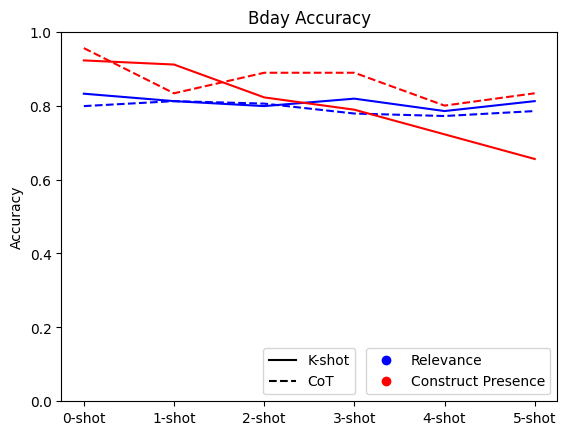

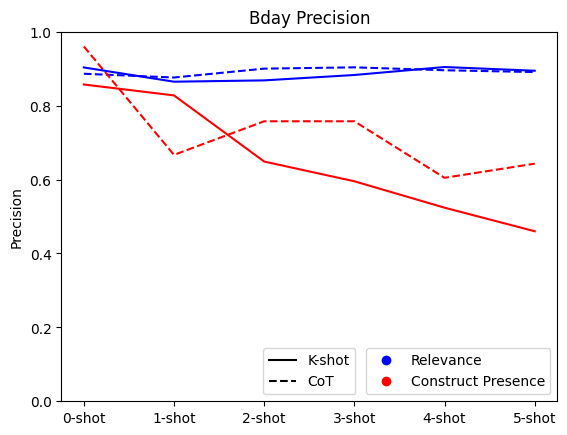

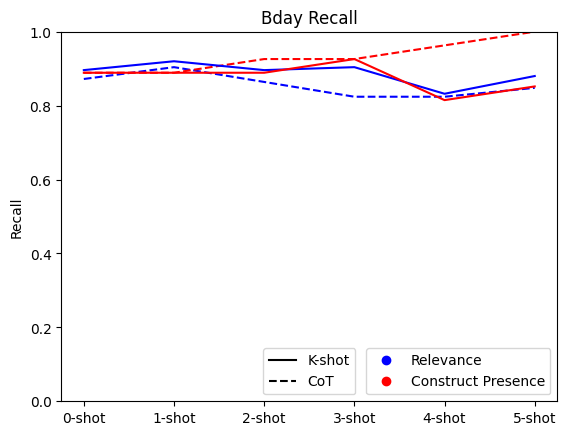

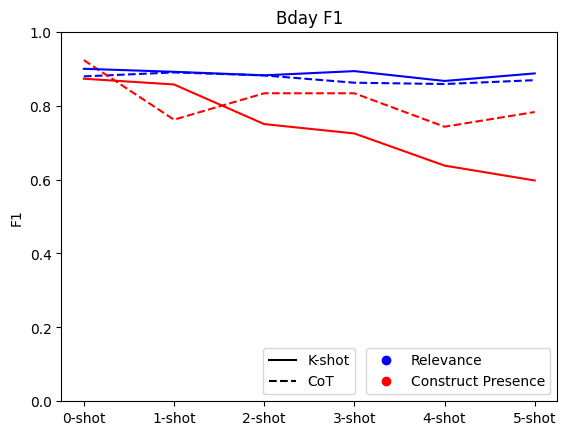

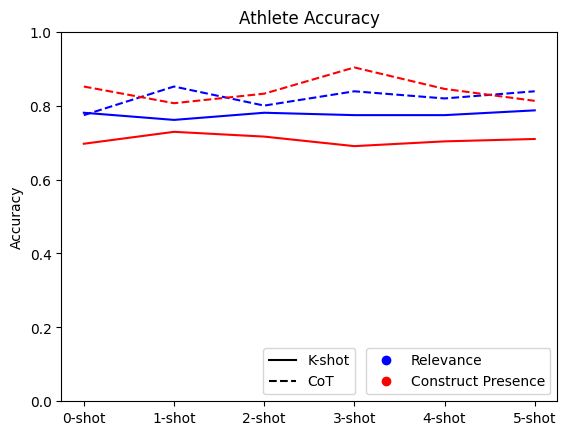

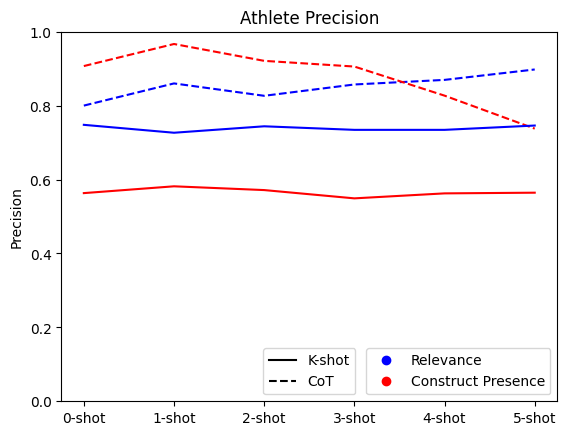

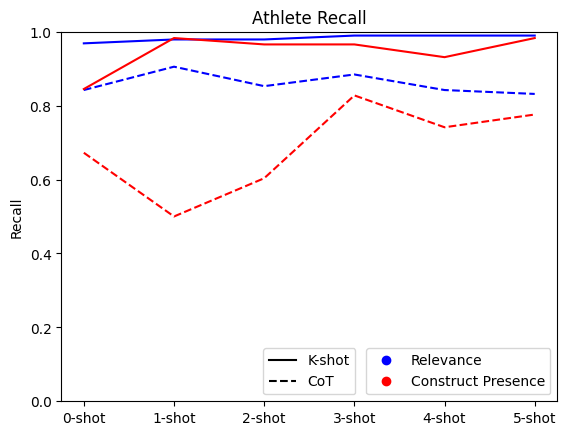

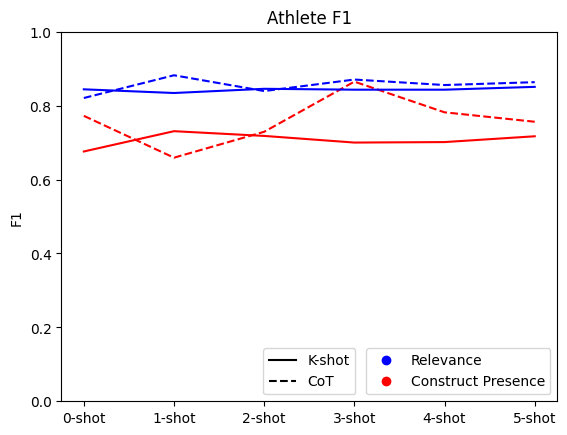

In [ ]:
tasks = ["bday", "athlete"]
metrics = ["accuracy", "precision", "recall", "f1"]

# Generate all binary plots
for task in tasks:
  for metric in metrics:
    line_plot_binary(eval(f"{task}_{metric}_df"), metric, f"{task.capitalize()} {metric.capitalize()}")

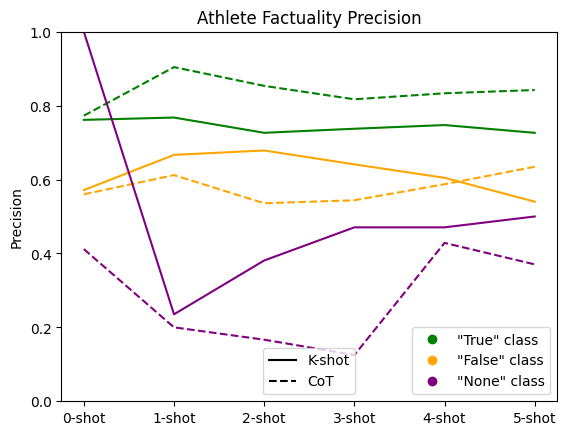

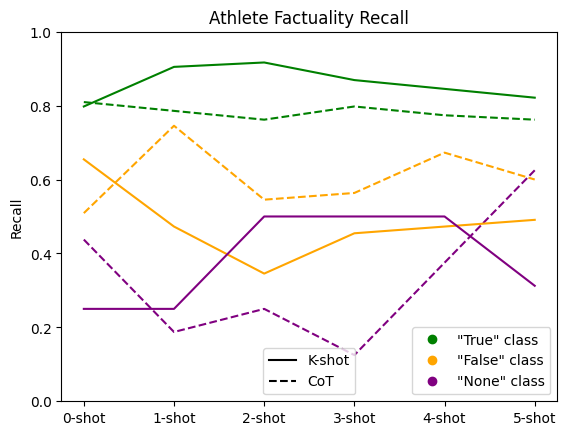

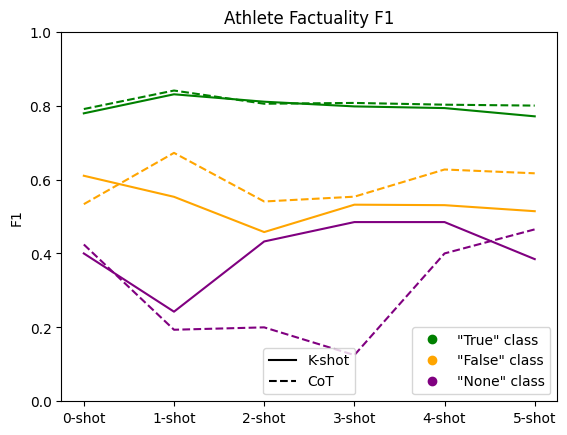

In [ ]:
for metric in ["precision", "recall", "f1"]:
  line_plot_multiclass(metric, f"Athlete Factuality {metric.capitalize()}")


# Observing the data

## Relevance

### Lex-relevance performance

In [ ]:
lex_baseline_df = pd.DataFrame({
    'Task': ['Birthday', 'Athlete'],
    'Accuracy': [lex_accuracy_bday, lex_accuracy_athlete],
    'precision': [lex_precision_score_bday, lex_precision_score_athlete],
    'recall': [lex_recall_score_bday, lex_recall_score_athlete],
    'f1': [lex_f1_score_bday, lex_f1_score_athlete]
})
lex_baseline_df.head()

,Task,Accuracy,precision,recall,f1
0,Birthday,0.610738,0.985507,0.544000,0.701031
1,Athlete,0.624161,0.866667,0.410526,0.557143


### Athletes relevance performance (LLM)

In [ ]:
# Looking at the athlete data
print("Accuracy\n", athlete_accuracy_df[["K-Shot", 'cot_relevance', "fs_relevance"]].describe(), "\n")
print("Precision\n", athlete_precision_df[["K-Shot", 'cot_relevance', "fs_relevance"]].describe(), "\n")
print("Recall\n", athlete_recall_df[["K-Shot", 'cot_relevance', "fs_relevance"]].describe(), "\n")
print("F1-score\n", athlete_f1_df[["K-Shot", 'cot_relevance', "fs_relevance"]].describe(), "\n")


Accuracy
        cot_relevance  fs_relevance
count       6.000000      6.000000
mean        0.820430      0.776344
std         0.028972      0.008815
min         0.774194      0.761290
25%         0.804839      0.774194
50%         0.829032      0.777419
75%         0.838710      0.780645
max         0.851613      0.787097 

Precision
        cot_relevance  fs_relevance
count       6.000000      6.000000
mean        0.851828      0.738885
std         0.034183      0.008394
min         0.800000      0.726562
25%         0.834184      0.734375
50%         0.858571      0.739187
75%         0.867174      0.745524
max         0.897727      0.747967 

Recall
        cot_relevance  fs_relevance
count       6.000000      6.000000
mean        0.859649      0.982456
std         0.028763      0.008595
min         0.831579      0.968421
25%         0.842105      0.978947
50%         0.847368      0.984211
75%         0.876316      0.989474
max         0.905263      0.989474 

F1-score
        cot

### Birthday relevance performance (LLM)

In [ ]:
# Look at the birthday data
print("Accuracy\n", bday_accuracy_df[["K-Shot", 'cot_relevance', "fs_relevance"]].describe(), "\n")
print("Precision\n", bday_precision_df[["K-Shot", 'cot_relevance', "fs_relevance"]].describe(), "\n")
print("Recall\n", bday_recall_df[["K-Shot", 'cot_relevance', "fs_relevance"]].describe(), "\n")
print("F1-score\n", bday_f1_df[["K-Shot", 'cot_relevance', "fs_relevance"]].describe(), "\n")


Accuracy
        cot_relevance  fs_relevance
count       6.000000      6.000000
mean        0.791946      0.809843
std         0.015882      0.016256
min         0.771812      0.785235
25%         0.780201      0.802013
50%         0.791946      0.812081
75%         0.803691      0.817114
max         0.812081      0.832215 

Precision
        cot_relevance  fs_relevance
count       6.000000      6.000000
mean        0.892011      0.886262
std         0.010022      0.017226
min         0.875969      0.864662
25%         0.887323      0.871866
50%         0.893204      0.888561
75%         0.898913      0.900997
max         0.903509      0.904348 

Recall
        cot_relevance  fs_relevance
count       6.000000      6.000000
mean        0.856000      0.888000
std         0.030777      0.030358
min         0.824000      0.832000
25%         0.830000      0.884000
50%         0.856000      0.896000
75%         0.870000      0.902000
max         0.904000      0.920000 

F1-score
        cot

## Construct presence

In [ ]:
#Athletes construct presence
print("Accuracy\n", athlete_accuracy_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]].describe(), "\n")
print(athlete_accuracy_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]], "\n")
print("\n\n\n")
print("Precision\n", athlete_precision_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]].describe(), "\n")
print( athlete_precision_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]])
print("\n\n\n")
print("Recall\n", athlete_recall_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]].describe(), "\n")
print(athlete_recall_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]])
print("\n\n\n")
print("F1-score\n", athlete_f1_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]].describe(), "\n")
print(athlete_f1_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]])


Accuracy
        cot_construct_present  fs_construct_present
count               6.000000              6.000000
mean                0.841935              0.707527
std                 0.034803              0.013937
min                 0.806452              0.690323
25%                 0.817742              0.698387
50%                 0.838710              0.706452
75%                 0.850000              0.714516
max                 0.903226              0.729032 

   K-Shot  cot_construct_present  fs_construct_present
0  0-shot               0.851613              0.696774
1  1-shot               0.806452              0.729032
2  2-shot               0.832258              0.716129
3  3-shot               0.903226              0.690323
4  4-shot               0.845161              0.703226
5  5-shot               0.812903              0.709677 





Precision
        cot_construct_present  fs_construct_present
count               6.000000              6.000000
mean                0.877

In [ ]:
# Same for bday task
print("Accuracy\n", bday_accuracy_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]], "\n")
print(bday_accuracy_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]].describe())
print("\n\n\n")
print("Precision\n", bday_precision_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]], "\n")
print(bday_precision_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]].describe())
print("\n\n\n")
print("Recall\n", bday_recall_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]], "\n")
print(bday_recall_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]].describe())
print("\n\n\n")
print("F1-score\n", bday_f1_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]], "\n")
print(bday_f1_df[["K-Shot", 'cot_construct_present', "fs_construct_present"]].describe())

Accuracy
    K-Shot  cot_construct_present  fs_construct_present
0  0-shot               0.955556              0.922222
1  1-shot               0.833333              0.911111
2  2-shot               0.888889              0.822222
3  3-shot               0.888889              0.788889
4  4-shot               0.800000              0.722222
5  5-shot               0.833333              0.655556 

       cot_construct_present  fs_construct_present
count               6.000000              6.000000
mean                0.866667              0.803704
std                 0.055777              0.104626
min                 0.800000              0.655556
25%                 0.833333              0.738889
50%                 0.861111              0.805556
75%                 0.888889              0.888889
max                 0.955556              0.922222




Precision
    K-Shot  cot_construct_present  fs_construct_present
0  0-shot               0.960000              0.857143
1  1-shot          

## Factuality



### Ternary factuality

Looking at the results

In [ ]:
COT_0_results

,class,precision,recall,f1
0,True,0.772727,0.809524,0.790698
1,False,0.560000,0.509091,0.533333
2,NaN,0.411765,0.437500,0.424242


In [ ]:
COT_1_results

,class,precision,recall,f1
0,True,0.90411,0.785714,0.840764
1,False,0.61194,0.745455,0.672131
2,NaN,0.20000,0.187500,0.193548


In [ ]:
COT_2_results

,class,precision,recall,f1
0,True,0.853333,0.761905,0.805031
1,False,0.535714,0.545455,0.540541
2,NaN,0.166667,0.250000,0.200000


In [ ]:
COT_3_results

,class,precision,recall,f1
0,True,0.817073,0.797619,0.807229
1,False,0.543860,0.563636,0.553571
2,NaN,0.125000,0.125000,0.125000


In [ ]:
COT_4_results

,class,precision,recall,f1
0,True,0.833333,0.773810,0.802469
1,False,0.587302,0.672727,0.627119
2,NaN,0.428571,0.375000,0.400000


In [ ]:
COT_5_results

,class,precision,recall,f1
0,True,0.842105,0.761905,0.800000
1,False,0.634615,0.600000,0.616822
2,NaN,0.370370,0.625000,0.465116


### Binary factuality
The model performs well for the "True" class, but the None and False classes are much worse. Let's try making them into the same class

In [ ]:
def make_factuality_binary(df):
  '''
  Turns all Nones into False in columns that have to do with factuality, making it a binary property.

  -------------
  parameters:
    df - the dataframe
  '''
  # columns that say "factual" in the name
  fact_colnames = df.filter(like='factual').columns.tolist()

  print(fact_colnames)

  for col in fact_colnames:
    df.loc[pd.isna(df[col])] = False

  return df

# A new dataframe that takes all False and None as the same class.
df_athlete_fact_binary = make_factuality_binary(df_athlete)

['factual', 'factual_FS_0', 'factual_FS_1', 'factual_FS_2', 'factual_FS_3', 'factual_FS_4', 'factual_FS_5', 'factual_COT_1', 'factual_COT_2', 'factual_COT_3', 'factual_COT_4', 'factual_COT_5', 'factual_COT_0', 'correct_prediction_factual_COT_0', 'correct_prediction_factual_COT_1', 'correct_prediction_factual_COT_2', 'correct_prediction_factual_COT_3', 'correct_prediction_factual_COT_4', 'correct_prediction_factual_COT_5', 'correct_prediction_factual_FS_0', 'correct_prediction_factual_FS_1', 'correct_prediction_factual_FS_2', 'correct_prediction_factual_FS_3', 'correct_prediction_factual_FS_4', 'correct_prediction_factual_FS_5']


<ipython-input-47-d4c8e7c739f7>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[pd.isna(df[col])] = False


Check whether the transformation worked (it seems so!)

In [ ]:
col_name_lists = col_name_lists_athletes
print_unique_values_per_col(df_athlete_fact_binary)



Unique values in factual: [False True]
Unique values in factual_FS_0: [False True]
Unique values in factual_FS_1: [False True]
Unique values in factual_FS_2: [True False]
Unique values in factual_FS_3: [True False]
Unique values in factual_FS_4: [True False]
Unique values in factual_FS_5: [True False]
Unique values in factual_COT_1: [False True]
Unique values in factual_COT_2: [True False]
Unique values in factual_COT_3: [True False]
Unique values in factual_COT_4: [True False]
Unique values in factual_COT_5: [True False]
Unique values in factual_COT_0: [False True]
Unique values in relevance_lex: [False  True]
Unique values in relevance_human: [ True False]
Unique values in relevance_FS_0: [ True False]
Unique values in relevance_FS_1: [ True False]
Unique values in relevance_FS_2: [ True False]
Unique values in relevance_FS_3: [ True False]
Unique values in relevance_FS_4: [ True False]
Unique values in relevance_FS_5: [ True False]
Unique values in relevance_COT_1: [ True False]
Uni

In [ ]:
# Usual binary precision for FS and COT
bi_fact_cot_precision_scores = list_maker(precision_score, df_athlete_fact_binary, 'factual', 'COT', 5)
bi_fact_fs_precision_scores = list_maker(precision_score, df_athlete_fact_binary, 'factual', 'FS', 5)

# Binary recall
bi_fact_cot_recall_scores = list_maker(recall_score, df_athlete_fact_binary, 'factual', 'COT', 5)
bi_fact_fs_recall_scores = list_maker(recall_score, df_athlete_fact_binary, 'factual', 'FS', 5)

# Binary F1
bi_fact_cot_f1_scores = list_maker(f1_score, df_athlete_fact_binary, 'factual', 'COT', 5)
bi_fact_fs_f1_scores = list_maker(f1_score, df_athlete_fact_binary, 'factual', 'FS', 5)


In [ ]:
bi_fact_precision_df = pd.DataFrame(list(zip(x_axis_labels, athlete_rel_cot_precision_scores, athlete_const_cot_precision_scores, bi_fact_cot_precision_scores, athlete_rel_fs_precision_scores, athlete_const_fs_precision_scores, bi_fact_fs_precision_scores)), columns=athlete_y_axis_labels)
bi_fact_precision_df

,K-Shot,cot_relevance,cot_construct_present,cot_factual,fs_relevance,fs_construct_present,fs_factual
0,0-shot,0.800000,0.906977,0.818182,0.747967,0.563218,0.816901
1,1-shot,0.860000,0.966667,0.921875,0.726562,0.581633,0.800000
2,2-shot,0.826531,0.921053,0.880597,0.744000,0.571429,0.790123
3,3-shot,0.857143,0.905660,0.830986,0.734375,0.549020,0.794872
4,4-shot,0.869565,0.826923,0.830986,0.734375,0.562500,0.815789
5,5-shot,0.897727,0.737705,0.882353,0.746032,0.564356,0.786667


In [ ]:
bi_fact_recall_df = pd.DataFrame(list(zip(x_axis_labels, athlete_rel_cot_recall_scores, athlete_const_cot_recall_scores, bi_fact_cot_recall_scores, athlete_rel_fs_recall_scores, athlete_const_fs_recall_scores, bi_fact_fs_recall_scores)), columns=athlete_y_axis_labels)
bi_fact_recall_df

,K-Shot,cot_relevance,cot_construct_present,cot_factual,fs_relevance,fs_construct_present,fs_factual
0,0-shot,0.842105,0.672414,0.954545,0.968421,0.844828,0.878788
1,1-shot,0.905263,0.500000,0.893939,0.978947,0.982759,0.969697
2,2-shot,0.852632,0.603448,0.893939,0.978947,0.965517,0.969697
3,3-shot,0.884211,0.827586,0.893939,0.989474,0.965517,0.939394
4,4-shot,0.842105,0.741379,0.893939,0.989474,0.931034,0.939394
5,5-shot,0.831579,0.775862,0.909091,0.989474,0.982759,0.893939


In [ ]:
bi_fact_f1_df = pd.DataFrame(list(zip(x_axis_labels, athlete_rel_cot_f1_scores, athlete_const_cot_f1_scores, bi_fact_cot_f1_scores, athlete_rel_fs_f1_scores, athlete_const_fs_f1_scores, bi_fact_fs_f1_scores)), columns=athlete_y_axis_labels)
print(bi_fact_f1_df.filter(like="factual"))
bi_fact_f1_df.describe()

   cot_factual  fs_factual
0     0.881119    0.846715
1     0.907692    0.876712
2     0.887218    0.870748
3     0.861314    0.861111
4     0.861314    0.873239
5     0.895522    0.836879


,cot_relevance,cot_construct_present,cot_factual,fs_relevance,fs_construct_present,fs_factual
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.855235,0.760587,0.882363,0.843392,0.707143,0.860901
std,0.022248,0.067481,0.018580,0.005380,0.019159,0.015984
min,0.820513,0.659091,0.861314,0.834081,0.675862,0.836879
25%,0.843437,0.735951,0.866265,0.843049,0.700325,0.850314
50%,0.859501,0.764290,0.884168,0.843543,0.709140,0.865930
75%,0.868697,0.779433,0.893446,0.845100,0.717707,0.872617
max,0.882051,0.864865,0.907692,0.850679,0.730769,0.876712


In [ ]:
# Plotting the binary factuality metrics

def line_plot_binary_factuality(df, metric, plot_title):
  """
  Generates a line plot showing the given metric for binary factuality, with one line for K-shot prompting and another one for CoT prompting.

  Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    metric (str): The metric to plot ("precision", "recall" or "f1").
    plot_title (str): The title of the plot.

  """
  # Define the x-axis labels
  x_labels = ['0-shot', '1-shot', '2-shot', '3-shot', '4-shot', '5-shot']

  # x-axis points (0, 1, 2, 3, 4, 5) corresponding to each x_label
  x_points = range(len(x_labels))
  plt.xticks(ticks=x_points, labels=x_labels)


  fs = df["fs_factual"]
  plt.plot(x_points, fs, label='K-shot', linestyle='-', color='black')
  cot = df["cot_factual"]
  plt.plot(x_points, cot, label='CoT', linestyle='--', color='black')
  plt.legend()
  plt.title(plot_title)
  plt.ylabel(metric.capitalize())
  plt.ylim(0, 1)


  plt.show()

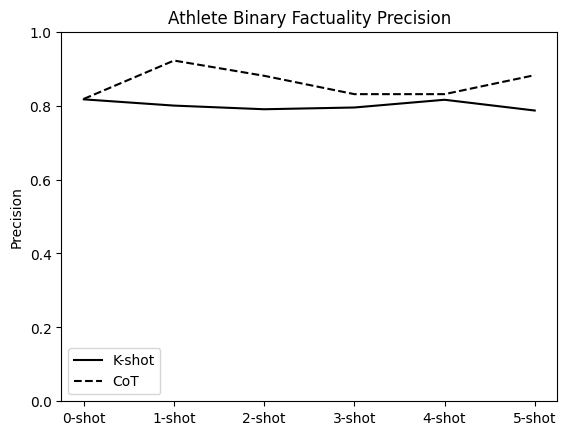

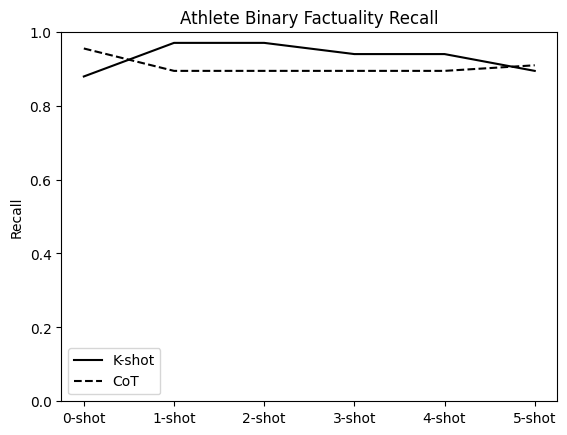

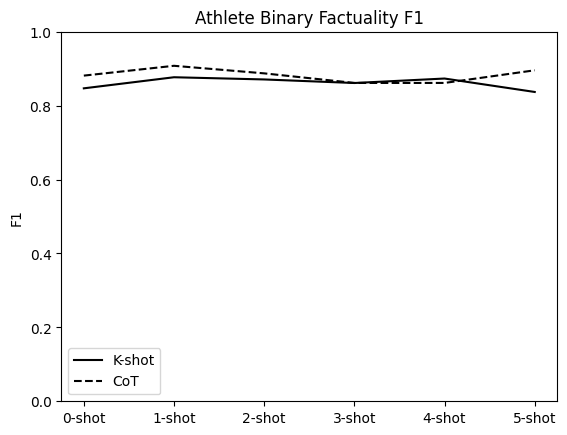

In [ ]:
# Generate plots for all the metrics of binary factuality
for metric in ["precision", "recall", "f1"]:
  line_plot_binary_factuality(eval(f"bi_fact_{metric}_df"), metric, f"Athlete Binary Factuality {metric.capitalize()}")